In [1]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'

In [2]:
import BBP_RTQC
from BBP_RTQC_paths import *
import subprocess
import numpy as np
import glob

import json #json manager
import re #regular expressions
import os

import matplotlib.pyplot as plt

In [3]:
f = open("BBP_RTQC_example_tests.json") # open the text file
t = json.load(f) # interpret the text file and make it usable by python
f.close()

In [4]:
a = []
for it,tmp in enumerate(t):
    a.append(json.loads(t[it]))


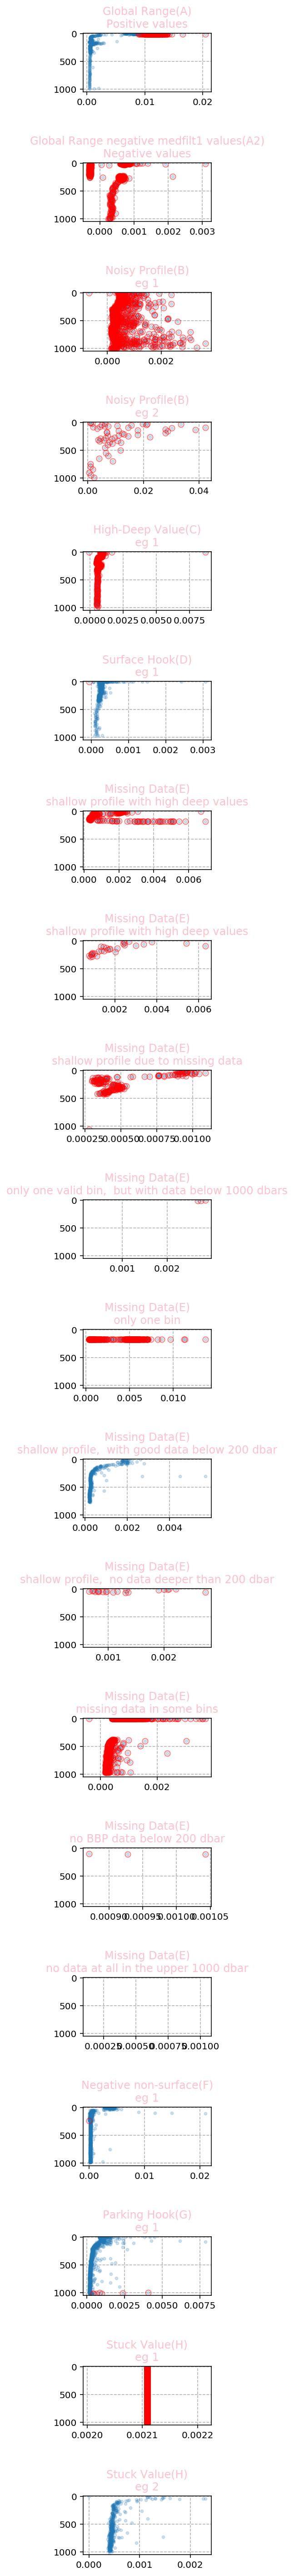

In [5]:
fig, ax = plt.subplots(len(a), figsize=(4, 40))
for it in np.arange(len(a)):
    ax[it].plot(a[it]['input']['BBP'], a[it]['input']['PRES'], '.', alpha=0.2)
    iQCed = np.where(np.asarray(a[it]['output']['flags_out'])>1)[0]
    ax[it].plot(np.asarray(a[it]['input']['BBP'])[iQCed], np.asarray(a[it]['input']['PRES'])[iQCed], 'ro', alpha=0.5, mfc='none')
    ax[it].grid('on', linestyle='--')
    ax[it].invert_yaxis()
    ax[it].set_title(a[it]['description'] + "(" + a[it]['code'] + ")\n"+
                    a[it]['specifics'], color='pink')
    ax[it].set_ylim([1050, -10])
    # ax.set_ylim([10, 4])
fig.tight_layout(pad=3.0)

In [6]:
# # Global Range Test: median-filtered negative values (A2)
# code = "A2"
# test = tests[code]
# test_function = test_functions[code]
# fn_eg = egs[code]

# # read data from specific example profile
# iwmo, fn_p, PRES, BBP700, JULD, LAT, LON, BBP700mf1, miss_no_prof, PARK_PRES, maxPRES, innan = start_rd_4_json(fn_eg)

# # create BBP700_QC_flags, BBP700_QC_1st_failed_test
# BBP700_QC_1st_failed_test = np.full(shape=BBP700.shape, fill_value='0')

# # GLOBAL-RANGE TEST for BBP700
# QC_FLAGS_OUT, BBP700_QC_1st_failed_test = BBP_RTQC.BBP_Global_range_test(BBP700, BBP700mf1, PRES, 
#                                                                   np.ones(BBP700.shape), BBP700_QC_1st_failed_test, 
#                                                                   fn_p, VERBOSE=False, PLOT=False, SAVEPLOT=False)

# # create string to store results of example test
# tmp = create_new_test_example(test, code, test_function, PRES.tolist(), BBP700.tolist(), 
#                               np.ones(BBP700.shape).tolist(), QC_FLAGS_OUT.tolist())

# # add example above to list to be saved
# all_eg_tests.append(tmp)

# del QC_FLAGS_OUT





In [7]:
# f = open("BBP_RTQC_example_tests_new.json") # open the text file
# t2 = json.load(f) # interpret the text file and make it usable by python
# f.close()

In [8]:
# a2 = []
# for it,tmp in enumerate(t2):
#     a2.append(json.loads(t2[it]))


In [9]:
# for it,tmp in enumerate(t2):
#     assert np.all(a[it]['output']['flags_out'] == a2[it]['output']['flags_out'])

In [10]:
icode = [it for it in range(len(a)) if a[it]['code']=='F'][0]
a[icode]['input'].keys()


dict_keys(['PRES', 'BBP', 'BBPmf1', 'flags_in'])